# Data Classification Enhancement Project: Optimizing Binary Prediction Models

## Project Overview

This project explores various preprocessing techniques to enhance binary classification performance. Working with an insurance claims dataset, I'll implement multiple data transformation approaches to optimize model accuracy and performance. The primary goal is to predict the probability of a driver initiating an auto insurance claim in the upcoming year.

## Project Steps

1. **Dataset Preparation**
   - Acquire the insurance claims dataset
   - Split the data into training, validation, and test sets following best practices
   - Establish baseline performance measurements

2. **Algorithm Selection**
   - Select appropriate classification algorithm(s) as baseline
   - Document initial performance metrics
   - Identify areas for potential improvement

3. **Binning Implementation**
   - Apply at least two different binning methods to selected features
   - Compare the effects of different binning approaches on classification performance
   - Visualize and analyze the impact of binning on model accuracy
   - Determine optimal binning strategy for the selected features

4. **Data Balancing Exploration**
   - Implement at least two data balancing techniques
   - Analyze how different balancing methods affect model performance
   - Compare various approaches and their impact on classification metrics
   - Identify the most effective balancing strategy for this particular dataset

5. **Feature Engineering and Transformation**
   - Transform existing features to enhance model performance
   - Create new features based on domain knowledge and data analysis
   - Document transformation methodologies and their rationale
   - Measure performance improvements from feature engineering

6. **Feature Selection Analysis**
   - Implement at least two feature selection methods
   - Identify the most predictive features in the dataset
   - Evaluate feature subsets using the validation dataset
   - Document the impact of feature selection on model performance

7. **Dimensionality Reduction with PCA**
   - Apply Principal Component Analysis to reduce dimensionality
   - Investigate the relationship between number of components and model performance
   - Visualize variance explained by principal components
   - Determine optimal number of components for the classification task

8. **Comprehensive Optimization**
   - Identify the best combination of preprocessing techniques
   - Conduct final classification tests comparing:
     - Original unprocessed data
     - Optimally preprocessed data
   - Provide detailed analysis of improvements achieved
   - Visualize performance gains through appropriate graphs

## Technical Considerations

- The dataset contains various feature types: binary, categorical, continuous, and ordinal
- Missing values are represented as -1 in the dataset
- Features are grouped by type (ind, reg, car, calc) with specific naming conventions
- Appropriate evaluation metrics will be selected based on the classification problem

This project demonstrates practical application of advanced data preprocessing techniques to enhance machine learning model performance in a real-world prediction scenario.

## I. Dataset and packages loading, data splitting

First I will need pandas package, so I will import it and at the same time I will load the dataset itself.

In [2]:
import pandas as pd

data = pd.read_csv('data.csv')

I'd like to list some basic information about the dataset and check if it has missing values.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 58 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   y             595212 non-null  int64  
 1   xind_01       595212 non-null  int64  
 2   xind_02_cat   595212 non-null  int64  
 3   xind_03       595212 non-null  int64  
 4   xind_04_cat   595212 non-null  int64  
 5   xind_05_cat   595212 non-null  int64  
 6   xind_06_bin   595212 non-null  int64  
 7   xind_07_bin   595212 non-null  int64  
 8   xind_08_bin   595212 non-null  int64  
 9   xind_09_bin   595212 non-null  int64  
 10  xind_10_bin   595212 non-null  int64  
 11  xind_11_bin   595212 non-null  int64  
 12  xind_12_bin   595212 non-null  int64  
 13  xind_13_bin   595212 non-null  int64  
 14  xind_14       595212 non-null  int64  
 15  xind_15       595212 non-null  int64  
 16  xind_16_bin   595212 non-null  int64  
 17  xind_17_bin   595212 non-null  int64  
 18  xind

In [4]:
data.isnull().sum()

y               0
xind_01         0
xind_02_cat     0
xind_03         0
xind_04_cat     0
xind_05_cat     0
xind_06_bin     0
xind_07_bin     0
xind_08_bin     0
xind_09_bin     0
xind_10_bin     0
xind_11_bin     0
xind_12_bin     0
xind_13_bin     0
xind_14         0
xind_15         0
xind_16_bin     0
xind_17_bin     0
xind_18_bin     0
xreg_01         0
xreg_02         0
xreg_03         0
xcar_01_cat     0
xcar_02_cat     0
xcar_03_cat     0
xcar_04_cat     0
xcar_05_cat     0
xcar_06_cat     0
xcar_07_cat     0
xcar_08_cat     0
xcar_09_cat     0
xcar_10_cat     0
xcar_11_cat     0
xcar_11         0
xcar_12         0
xcar_13         0
xcar_14         0
xcar_15         0
xcalc_01        0
xcalc_02        0
xcalc_03        0
xcalc_04        0
xcalc_05        0
xcalc_06        0
xcalc_07        0
xcalc_08        0
xcalc_09        0
xcalc_10        0
xcalc_11        0
xcalc_12        0
xcalc_13        0
xcalc_14        0
xcalc_15_bin    0
xcalc_16_bin    0
xcalc_17_bin    0
xcalc_18_b

We can see that the dataset is ready to use, now I can split the data intro a train, validation and test sets.

In [5]:
Xdata = data.drop('y', axis=1)
ydata = data.y

In [6]:
from sklearn.model_selection import train_test_split

Xtrainbasic, Xtempbasic, ytrainbasic, ytempbasic = train_test_split(Xdata, ydata, test_size=0.4, random_state=111) 

display(Xtrainbasic.shape)
display(ytrainbasic.shape)
display(Xtempbasic.shape)
display(ytempbasic.shape)

(357127, 57)

(357127,)

(238085, 57)

(238085,)

In [7]:
Xvalbasic, Xtestbasic, yvalbasic, ytestbasic = train_test_split(Xtempbasic, ytempbasic, test_size=0.5, random_state=111) 

display(Xvalbasic.shape)
display(yvalbasic.shape)
display(Xtestbasic.shape)
display(ytestbasic.shape)

(119042, 57)

(119042,)

(119043, 57)

(119043,)

The data are split in a 6/2/2 ratio, where the training set is the largest (60%), and the test and validation sets are in the same ratio. Thus, it is possible to apply machine learning models and search for the best one.

## II. Classification algorithms

Since y is a binary value, we're working on a binary classification problem. Thus, I'd like to use these 3 algorithms: random forest, gradient boosting and logistic regression.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

## III. Binning methods

Binning is a feature engineering technique that groups different numerical subranges into bins or buckets. Basically it's a way to group a number of continuous values into a smaller number of "bins". Continuous or ordinal features are best suited for binning, because they have an inherent numeric order or range that can be meaningfully divided into segments, making it easier to group similar values together. I'll be using these binning methods:
- equal-width binning,
- equal-height binning,
- equal-frequency binning,

on these features: xind_01, xreg_03, xcar_12, xcalc_14.

I will first draw a graph of the distribution of values for each of these features to see how to work with them.

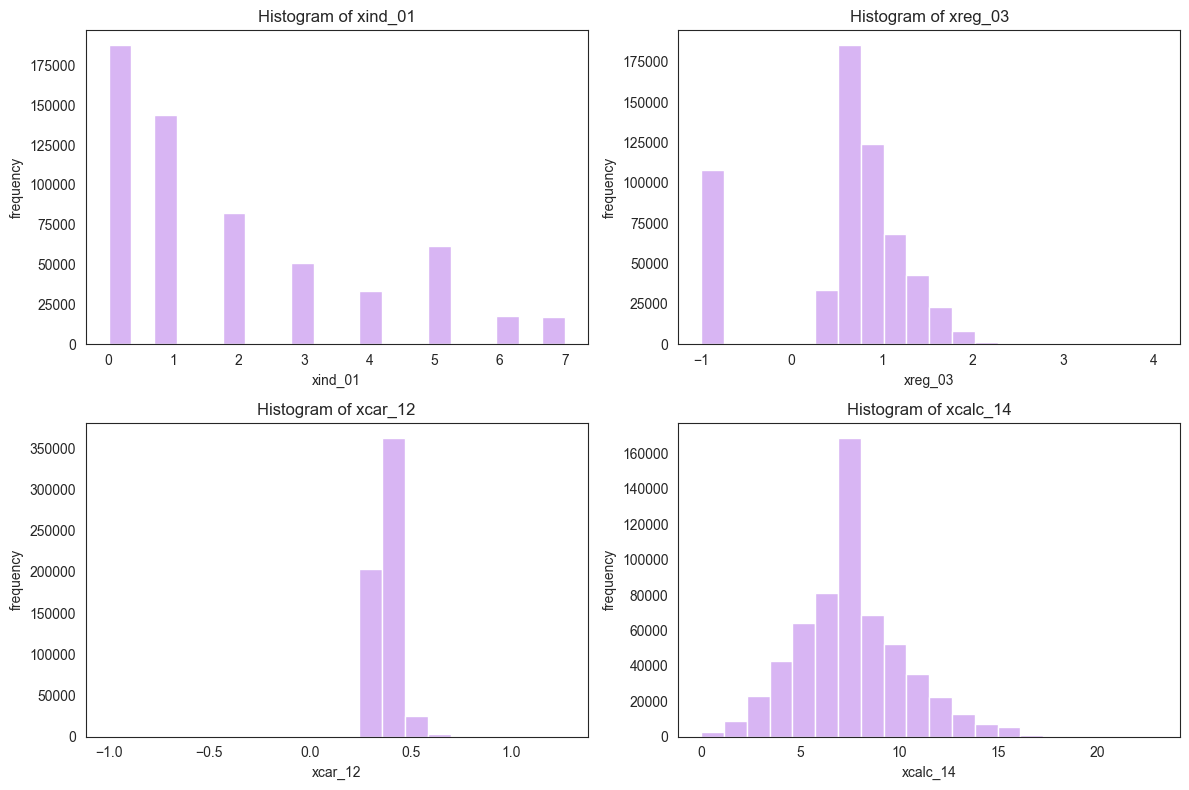

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
columns = ['xind_01', 'xreg_03', 'xcar_12', 'xcalc_14']
sns.set_style("white")

plt.figure(figsize=(12, 8))
for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)  # 2x2 grid for 4 plots
    sns.histplot(data[column], bins=20, color='#CB9DF0')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('frequency')

plt.tight_layout()
plt.show()

Next I'll create 3 functions to perfrom binning on these columns.

In [10]:
def equalwidthbinning(column, bins):
    binned = pd.cut(column, bins=bins, labels=False)
    return binned

In [11]:
def equalheightbinning(column, bins):
    binned = pd.qcut(column, q=bins, labels=False, duplicates='drop')
    return binned

In [12]:
def equalquantilebinning(column, bins):
    binned = pd.qcut(column, q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=False, duplicates='drop')
    return binned

In [13]:
# Define the number of bins for each column
bincounts = {
    'xind_01': 4,
    'xreg_03': 10,
    'xcar_12': 8,
    'xcalc_14': 8
}

In [14]:
# Apply equal-width binning
for column, bins in bincounts.items():
    data[f'{column}_ew_binned'] = equalwidthbinning(data[column], bins)

In [15]:
# Apply equal-height binning
for column, bins in bincounts.items():
    data[f'{column}_eh_binned'] = equalheightbinning(data[column], bins)

In [16]:
# Apply equal-quantile binning
for column, bins in bincounts.items():
    data[f'{column}_eq_binned'] = equalquantilebinning(data[column], bins)

In [17]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 70 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   y                   595212 non-null  int64  
 1   xind_01             595212 non-null  int64  
 2   xind_02_cat         595212 non-null  int64  
 3   xind_03             595212 non-null  int64  
 4   xind_04_cat         595212 non-null  int64  
 5   xind_05_cat         595212 non-null  int64  
 6   xind_06_bin         595212 non-null  int64  
 7   xind_07_bin         595212 non-null  int64  
 8   xind_08_bin         595212 non-null  int64  
 9   xind_09_bin         595212 non-null  int64  
 10  xind_10_bin         595212 non-null  int64  
 11  xind_11_bin         595212 non-null  int64  
 12  xind_12_bin         595212 non-null  int64  
 13  xind_13_bin         595212 non-null  int64  
 14  xind_14             595212 non-null  int64  
 15  xind_15             595212 non-nul

I will now prepare and train models on each binning to compare them.

In [18]:
X=data.drop('y', axis=1)
y=data['y']

Xtrain, Xtemp, ytrain, ytemp = train_test_split(X, y, test_size=0.4, random_state=111) 
Xval, Xtest, yval, ytest = train_test_split(Xtemp, ytemp, test_size=0.5, random_state=111) 

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# Classification model to compare binning methods
clf = DecisionTreeClassifier()

# Define columns for comparing
columns_for_binning = ['xind_01', 'xreg_03', 'xcar_12', 'xcalc_14']

# Original data
Xtrain_original = Xtrain[columns_for_binning]
Xval_original = Xval[columns_for_binning]

clf.fit(Xtrain_original, ytrain)
ypred_orig = clf.predict(Xval_original)
print('No binning\nAccuracy:', accuracy_score(yval, ypred_orig), '\nF1-score:', f1_score(yval, ypred_orig, average='weighted'))
print()

# Equal width binning
Xtrain_ew = Xtrain[[f'{col}_ew_binned' for col in columns_for_binning]]
Xval_ew = Xval[[f'{col}_ew_binned' for col in columns_for_binning]]

clf.fit(Xtrain_ew, ytrain)
ypred_ew = clf.predict(Xval_ew)
print('Equal width binning\nAccuracy:', accuracy_score(yval, ypred_ew), '\nF1-score:', f1_score(yval, ypred_ew, average='weighted'))
print()

# Equal height ninning
Xtrain_eh = Xtrain[[f'{col}_eh_binned' for col in columns_for_binning]]
Xval_eh = Xval[[f'{col}_eh_binned' for col in columns_for_binning]]

clf.fit(Xtrain_eh, ytrain)
ypred_eh = clf.predict(Xval_eh)
print('Equal height binning\nAccuracy:', accuracy_score(yval, ypred_eh), '\nF1-score:', f1_score(yval, ypred_eh, average='weighted'))
print()

# Equal quantile binning
Xtrain_eq = Xtrain[[f'{col}_eq_binned' for col in columns_for_binning]]
Xval_eq = Xval[[f'{col}_eq_binned' for col in columns_for_binning]]

clf.fit(Xtrain_eq, ytrain)
ypred_eq = clf.predict(Xval_eq)
print('Equal quantile binning\nAccuracy:', accuracy_score(yval, ypred_eq), '\nF1-score:', f1_score(yval, ypred_eq, average='weighted'))

No binning
Accuracy: 0.9348969271349608 
F1-score: 0.9323384281564202

Equal width binning
Accuracy: 0.963365870869105 
F1-score: 0.9454400434049285

Equal height binning
Accuracy: 0.9634162732480973 
F1-score: 0.9454652364918733

Equal quantile binning
Accuracy: 0.9634162732480973 
F1-score: 0.9454652364918733


The original data (without any binning) performs well, achieving high accuracy and F1-score. After applying equal-width binning, both accuracy and F1-score improve slightly. Equal-height binning also shows similar results to equal-width binning. Equal-quantile binning results are identical to equal-height binning, indicating that quantile-based discretization also improves the model’s performance, with similar benefits to those seen with equal height and equal width.

All three binning methods (equal width, equal height, and equal quantile) slightly outperform the original data in terms of both accuracy and F1-score. However, the differences between the binning methods themselves are minimal.

## IV. Data balancing techniques

An imbalanced dataset occurs when classes (or categories) in a dataset are not represented equally. For example, in a binary classification problem where 90% of the samples belong to Class A and only 10% to Class B, models are likely to be biased toward the majority class (Class A), leading to poor performance on the minority class (Class B). Data balancing techniques help address this issue by making the classes more evenly represented, improving the model's ability to generalize across both classes.

The two main types are under-sampling and over-sampling. I will apply each of them and compare the efficiency of model prediction between them.

y
0    573518
1     21694
Name: count, dtype: int64


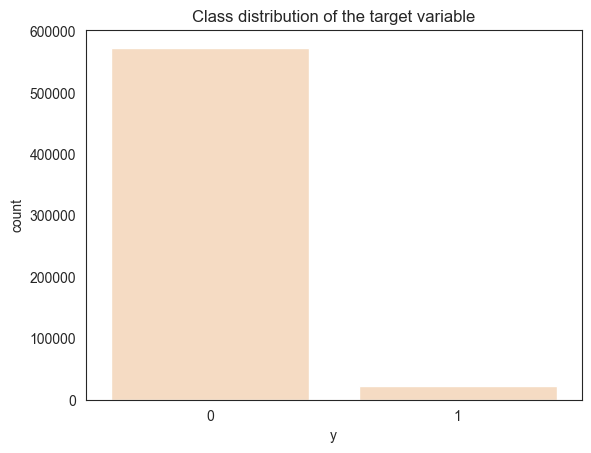

In [20]:
class_counts = data['y'].value_counts()
print(class_counts)

# Plot class distribution
sns.set_style("white")
sns.countplot(x='y', data=data, color='#FDDBBB')
plt.title('Class distribution of the target variable')
plt.show()

It has been observed that our target class is imbalanced. So, I’ll resample the data so that the minority class matches the majority class.

In [21]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=111)
X_undersampled, y_undersampled = undersample.fit_resample(Xtrainbasic, ytrainbasic)

In [22]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=111)
X_oversampled, y_oversampled = oversample.fit_resample(Xtrainbasic, ytrainbasic)

Again, I'll compare the results of the sampling methods using the random forest model.

In [23]:
clf_basic = RandomForestClassifier(random_state=111)
clf_basic.fit(Xtrainbasic, ytrainbasic)
y_pred_basic = clf_basic.predict(Xvalbasic)

clf_under = RandomForestClassifier(random_state=111)
clf_under.fit(X_undersampled, y_undersampled) # aka Xtrain/ytrain
y_pred_under = clf_under.predict(Xvalbasic)

clf_over = RandomForestClassifier(random_state=111)
clf_over.fit(X_oversampled, y_oversampled) # aka Xtrain/ytrain
y_pred_over = clf_over.predict(Xvalbasic)

In [24]:
from sklearn.metrics import confusion_matrix
from collections import Counter

# Function for evaluation and visualisation of results
def evaluate(y_true, y_pred, y_train, method, classnames):
    # Confusion matrix
    cnfmtx = confusion_matrix(y_true, y_pred)
    
    # Print results
    print(f'{method} results')
    print('Training class distribution:', Counter(y_train))
    print('Accuracy:', accuracy_score(y_true, y_pred))
    print('F1-score:', f1_score(y_true, y_pred, average='weighted'))
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cnfmtx, annot=True, fmt='.2f', cmap='YlOrBr', xticklabels=classnames, yticklabels=classnames, cbar=False)
    plt.title(f'Confusion matrix - {method}')
    plt.xlabel('predicted')
    plt.ylabel('true')
    plt.show()

No sampling results
Training class distribution: Counter({0: 344205, 1: 12922})
Accuracy: 0.9633994724550998
F1-score: 0.945456838939943


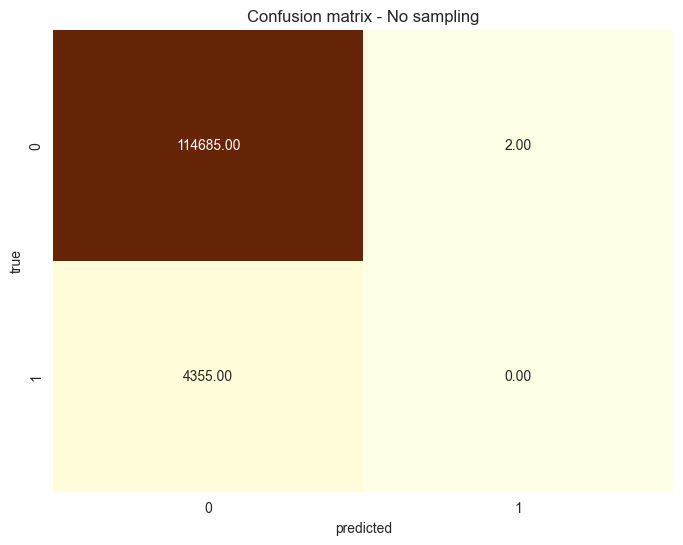

Undersampling results
Training class distribution: Counter({0: 12922, 1: 12922})
Accuracy: 0.5973353942306077
F1-score: 0.7174906773938438


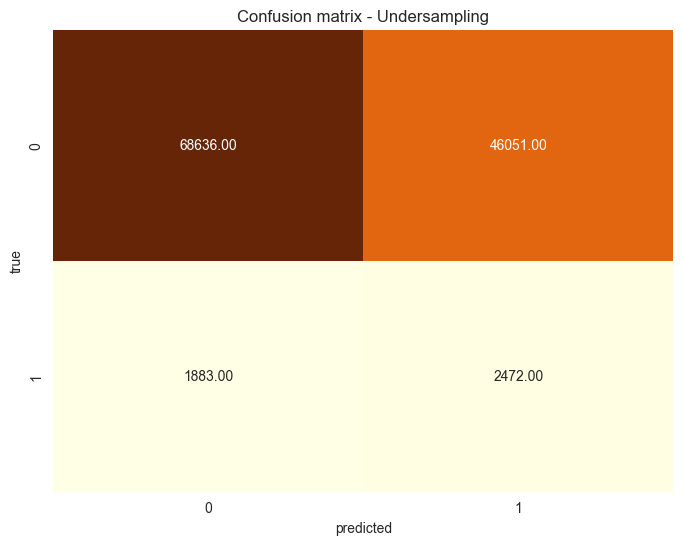

Oversampling results
Training class distribution: Counter({0: 344205, 1: 344205})
Accuracy: 0.9613497757094135
F1-score: 0.9445567363087797


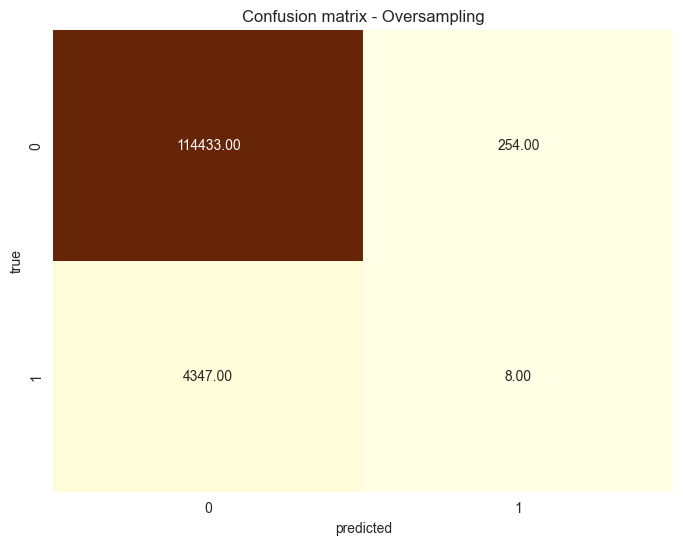

In [25]:
classnames = ['0', '1']

# No resampling
evaluate(y_true=yvalbasic,
         y_pred=y_pred_basic,
         y_train=ytrainbasic,
         method='No sampling', 
         classnames=classnames)

# Undersampling
evaluate(y_true=yvalbasic, 
         y_pred=y_pred_under, 
         y_train=y_undersampled, 
         method='Undersampling', 
         classnames=classnames)

# Oversampling
evaluate(y_true=yvalbasic,
         y_pred=y_pred_over,
         y_train=y_oversampled,
         method='Oversampling',
         classnames=classnames)

The results are quite interesting, a quick glance shows that oversampling behaved much better than undersampling. The model trained on the original, imbalanced dataset achieved the highest accuracy (96.34%) and a strong F1-score (94.55%). However, the class imbalance likely biases the model toward the majority class, as accuracy alone may not reflect performance for the minority class. By balancing the dataset through undersampling, the F1-score improved to 71.75%, indicating better handling of the minority class. However, accuracy dropped significantly to 59.73%, as the reduced majority class size limits the overall predictive power for the dominant class. Oversampling balanced the dataset by increasing the size of the minority class, leading to an F1-score similar to the no-sampling case (94.46%) and a slightly lower accuracy (96.13%). This means that oversampling allows the model to better account for the minority class without sacrificing significant accuracy.

## V. Feature engineering

To improve the model's performance in this binary classification task, we can focus on feature engineering and data transformation strategies.

First, I can replace -1 with NaN to mark missing values explicitly. Then, for categorical features I can create a separate category for mssing values. For continuous/ordinal features, I can impute missing values using statistical methods.

In [26]:
# Count occurrences of -1 in each column
negative_ones_count = data.isin([-1]).sum()
print(negative_ones_count)

y                       0
xind_01                 0
xind_02_cat           216
xind_03                 0
xind_04_cat            83
                     ... 
xcalc_14_eh_binned      0
xind_01_eq_binned       0
xreg_03_eq_binned       0
xcar_12_eq_binned       0
xcalc_14_eq_binned      0
Length: 70, dtype: int64


In [27]:
# Identify columns containing -1
columns_with_negative_ones = data.columns[(data == -1).any()].tolist()
print("Columns with -1 values:", columns_with_negative_ones)

Columns with -1 values: ['xind_02_cat', 'xind_04_cat', 'xind_05_cat', 'xreg_03', 'xcar_01_cat', 'xcar_02_cat', 'xcar_03_cat', 'xcar_05_cat', 'xcar_07_cat', 'xcar_09_cat', 'xcar_11', 'xcar_12', 'xcar_14']


In [28]:
# Replace -1 with NaN
import numpy as np
data.replace(-1, np.nan, inplace=True)

In [29]:
# Fill NaN in categorical features with a new category "0"
catcols = ['xind_02_cat', 'xind_04_cat', 'xind_05_cat', 'xcar_01_cat', 'xcar_02_cat', 'xcar_03_cat', 'xcar_05_cat', 'xcar_07_cat', 'xcar_09_cat']
data[catcols] = data[catcols].fillna(value=0)

In [30]:
# Fill NaNs in continious features with median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
data[['xreg_03', 'xcar_11', 'xcar_12', 'xcar_14']] = imputer.fit_transform(data[['xreg_03', 'xcar_11', 'xcar_12', 'xcar_14']])

Since all categorical features are already represented by integers like 0, 1, 2, 3, 4, we don't have to do one-hot encoding. We are in luck! Scaling is also unnecessary because we have no range-differentiated features. Now what can we do is to create some new features by aggregating old ones or add interaction features.

In [31]:
# Creating interaction features
data['xind_02_cat_xcar_01_cat'] = data['xind_02_cat'] * data['xcar_01_cat']
data['xcar_03_cat_xcar_14'] = data['xcar_03_cat'] * data['xcar_14']
data['xind_05_cat_xcar_09_cat'] = data['xind_05_cat'] * data['xcar_09_cat']

data['sum_indicators'] = data[['xind_01', 'xind_03', 'xind_14']].sum(axis=1)
data['reg_car_product'] = data['xreg_01'] * data['xcar_12']
data['reg_ratio'] = data['xreg_01'] / (data['xreg_02'] + 1e-5)  # Avoid division by zero

In [32]:
# Creating aggregation features
data['mean_xcar_cat'] = data[['xcar_01_cat', 'xcar_02_cat', 'xcar_03_cat']].mean(axis=1)
data['sum_xcar_05_and_xcar_09'] = data['xcar_05_cat'] + data['xcar_09_cat']
data['max_xcar_14_and_xcar_15'] = data[['xcar_14', 'xcar_15']].max(axis=1)

data['car_agg_mean'] = data.groupby('xcar_01_cat')['xreg_01'].transform('mean')
data['car_agg_max'] = data.groupby('xcar_01_cat')['xcalc_01'].transform('max')

In [33]:
# Some binary features

data['is_high_calc'] = (data['xcalc_14'] > 0.8).astype(int)
data['is_reg_missing'] = data['xreg_03'].isnull().astype(int)

## VI. Feature selection

Now we've got a lot of new columns in the dataset. Of course I'm not going to use them all for my model, so I have to use some selection methods and drop unnecessary or irrelevant features. I'll check for features with high correlations, low variance, or features that are irrelevant to the target variable based on domain knowledge or feature importance scores. This helps streamline the dataset and improves the model's efficiency and interpretability.

In [34]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 83 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   y                        595212 non-null  int64  
 1   xind_01                  595212 non-null  int64  
 2   xind_02_cat              595212 non-null  float64
 3   xind_03                  595212 non-null  int64  
 4   xind_04_cat              595212 non-null  float64
 5   xind_05_cat              595212 non-null  float64
 6   xind_06_bin              595212 non-null  int64  
 7   xind_07_bin              595212 non-null  int64  
 8   xind_08_bin              595212 non-null  int64  
 9   xind_09_bin              595212 non-null  int64  
 10  xind_10_bin              595212 non-null  int64  
 11  xind_11_bin              595212 non-null  int64  
 12  xind_12_bin              595212 non-null  int64  
 13  xind_13_bin              595212 non-null  int64  
 14  xind

Currently we have 83 columns and no missing values. To identify redundant features, I will aply these methods:
- variance threshold method,
- correlation method,
- wrapper method.

The variance threshold method is a simple feature selection technique that removes features with low variance, assuming they have little predictive power. By specifying a threshold, only features with variance above this value are retained, effectively eliminating nearly constant or redundant features.

In [35]:
# Variance threshold
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
selector.fit(data)
low_variance_features = [col for col, var in zip(data.columns, selector.variances_) if var < 0.01]

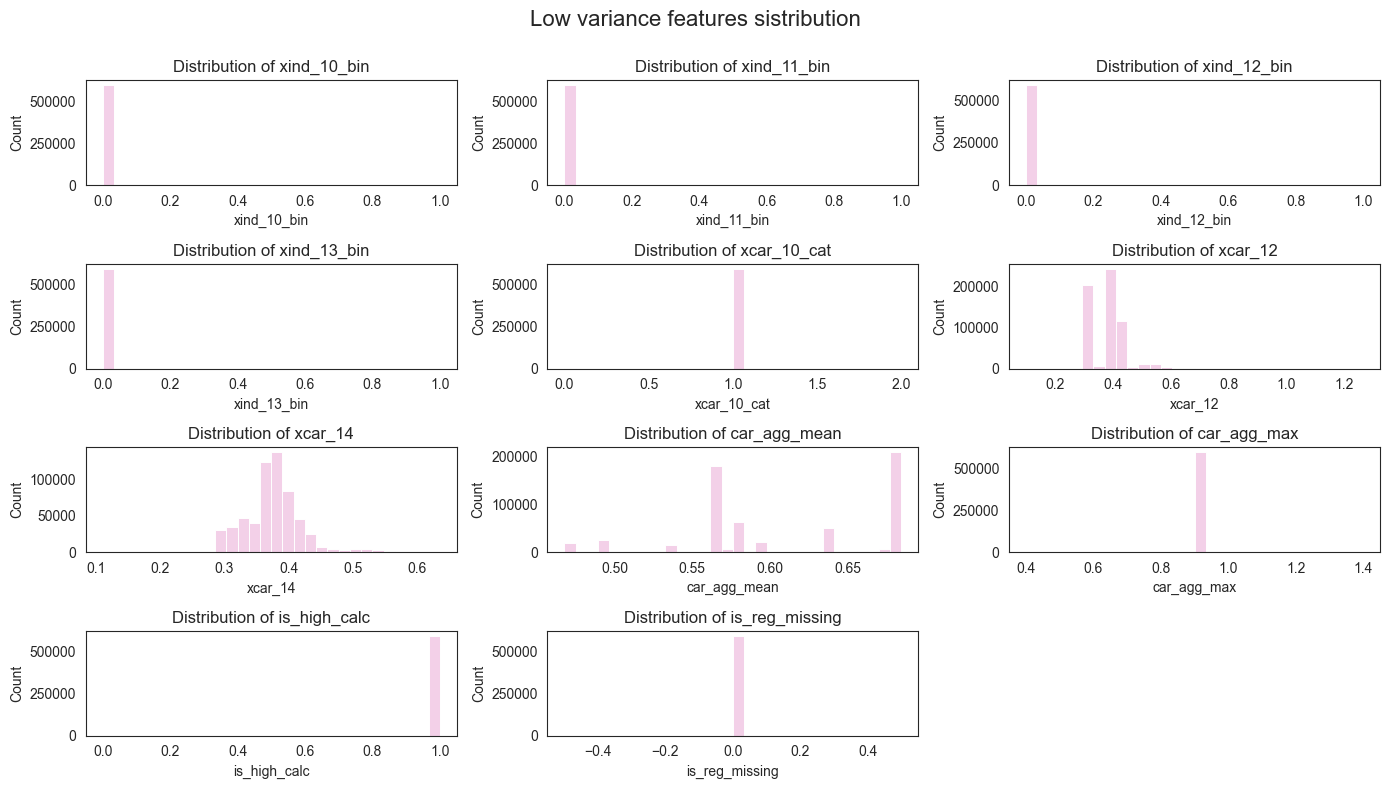

In [36]:
# Create histograms for low variance features
low_variance_features = [col for col in data.columns if data[col].var() < 0.01]

fig, axes = plt.subplots(len(low_variance_features) // 3 + 1, 3, figsize=(14, 8))
axes = axes.flatten()

# Plot each feature
for i, col in enumerate(low_variance_features):
    sns.histplot(data[col], bins=30, color='#F0C1E1', kde=False, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    
# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Low variance features sistribution', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [37]:
low_variance_features

['xind_10_bin',
 'xind_11_bin',
 'xind_12_bin',
 'xind_13_bin',
 'xcar_10_cat',
 'xcar_12',
 'xcar_14',
 'car_agg_mean',
 'car_agg_max',
 'is_high_calc',
 'is_reg_missing']

Now I'll exclude the low variance features and train my model on the new dataset.

In [38]:
high_variance_features = Xdata.columns.difference(low_variance_features)
X_high_variance = X[high_variance_features]

In [39]:
from sklearn.model_selection import train_test_split

Xtrain, Xtemp, ytrain, ytemp = train_test_split(X_high_variance, ydata, test_size=0.4, random_state=111)
Xval, Xtest, yval, ytest = train_test_split(Xtemp, ytemp, test_size=0.5, random_state=111)

In [40]:
from sklearn.metrics import classification_report

# Train a model
model = RandomForestClassifier(random_state=111)
model.fit(Xtrain, ytrain)

# Make predictions
y_pred = model.predict(Xval)

# Evaluate the model
print(classification_report(yval, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114687
           1       0.00      0.00      0.00      4355

    accuracy                           0.96    119042
   macro avg       0.48      0.50      0.49    119042
weighted avg       0.93      0.96      0.95    119042



The classification report indicates that the model performs well for class 0 (the majority class), with high precision (0.96), perfect recall (1.00), and a strong F1-score (0.98). However, the model struggles with class 1 (the minority class), showing a precision, recall, and F1-score of 0.00, which suggests that it is not effectively identifying the minority class at all. This imbalance in performance is reflected in the macro average, where both precision and recall are low (0.48 and 0.50, respectively). Despite this, the overall accuracy is high (0.96), but this is misleading due to the model’s failure to classify the minority class. A better evaluation metric would consider F1-scores or other methods that address class imbalance, such as precision-recall curves or balanced accuracy.

Next method is a correlation approach. It involves identifying and removing features that are highly correlated with each other to reduce multicollinearity in the model. This is typically done by calculating the correlation matrix and eliminating one of each pair of features that have a correlation above a certain threshold (e.g., 0.9). By removing redundant features, the model can become more efficient, and overfitting can be reduced, leading to better generalization.

I'll plot a correlation matrix at first.

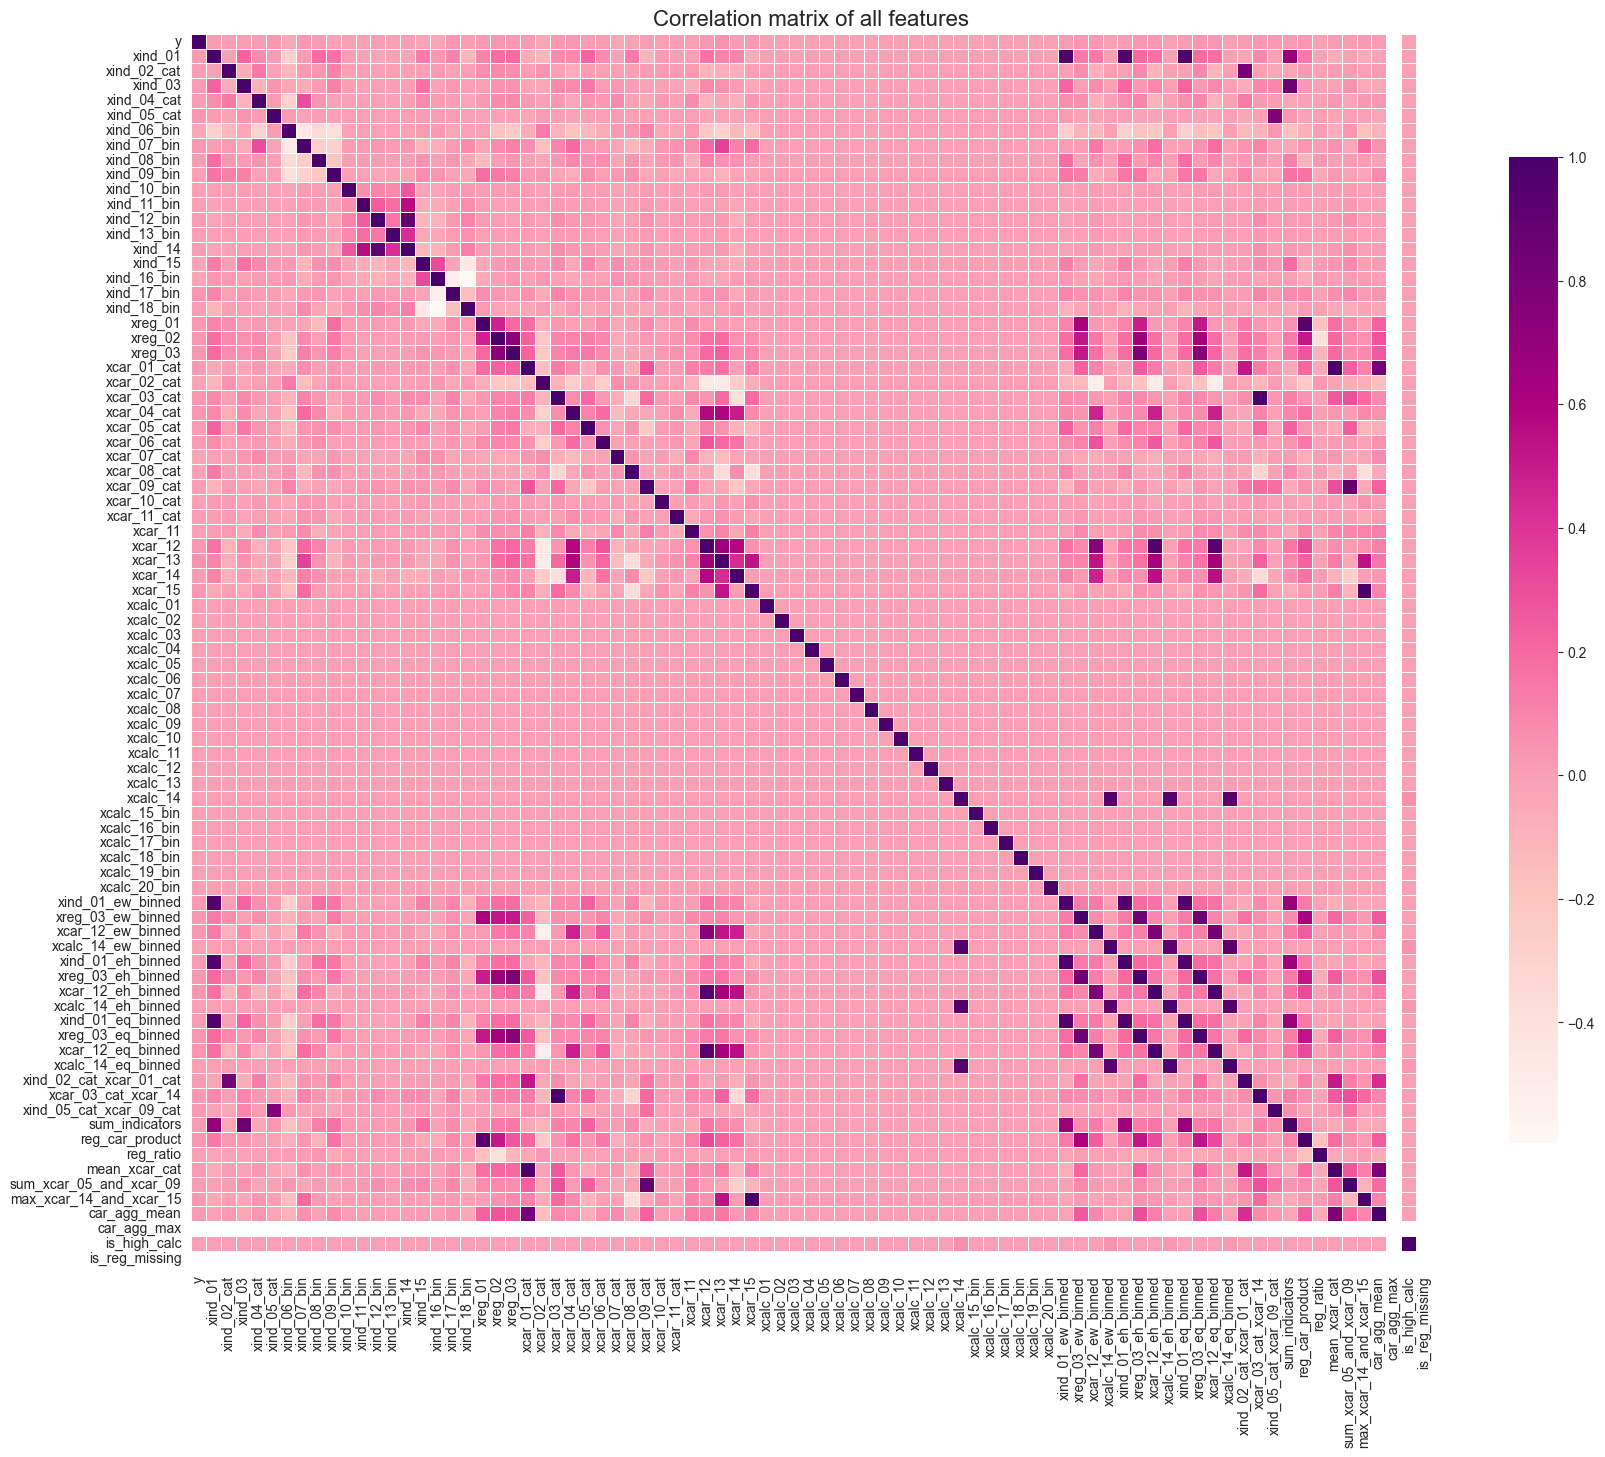

In [41]:
# Correlation matrix
corr_matrix = data.corr()

# Plot the matrix
plt.figure(figsize=(20,16))
sns.heatmap(
    corr_matrix,
    annot=False,
    cmap="RdPu",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title('Correlation matrix of all features', fontsize=16)
plt.show()

The correlation heatmap reveals several important insights into the relationships between features in the dataset. First, the diagonal of the matrix, representing self-correlation, is expectedly all 1.0. In addition, there are several feature groups with high internal correlations, particularly within the `xcalc` and `xcar` categories, indicating redundancy between these features. Features with weak or no correlation (light pink areas) may offer independent information to the model, potentially useful for improving generalization. The target variable (`y`) shows varying degrees of correlation with other features, with some features exhibiting high correlation, signaling their potential usefulness in predicting the target. Features with very high correlation (greater than 0.9) can be considered for removal or transformation to reduce multicollinearity and improve model performance.

Now I'll drop the highly correlated features and train the model on this neew dataset.

In [42]:
# Set correlation threshold
threshold = 0.9

# Find highly correlated features
corr_matrix = data.corr()

# Create a mask to get the upper triangle of the correlation matrix (since it's symmetric)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation above the threshold
highly_correlated_features = [column for column in upper_triangle.columns if any(abs(upper_triangle[column]) > threshold)]

print("Highly correlated features (above threshold):", highly_correlated_features)

Highly correlated features (above threshold): ['xind_01_ew_binned', 'xcalc_14_ew_binned', 'xind_01_eh_binned', 'xcar_12_eh_binned', 'xcalc_14_eh_binned', 'xind_01_eq_binned', 'xreg_03_eq_binned', 'xcar_12_eq_binned', 'xcalc_14_eq_binned', 'xcar_03_cat_xcar_14', 'reg_car_product', 'mean_xcar_cat', 'max_xcar_14_and_xcar_15']


Text(0.5, 1.0, 'Correlation matrix after feature selection')

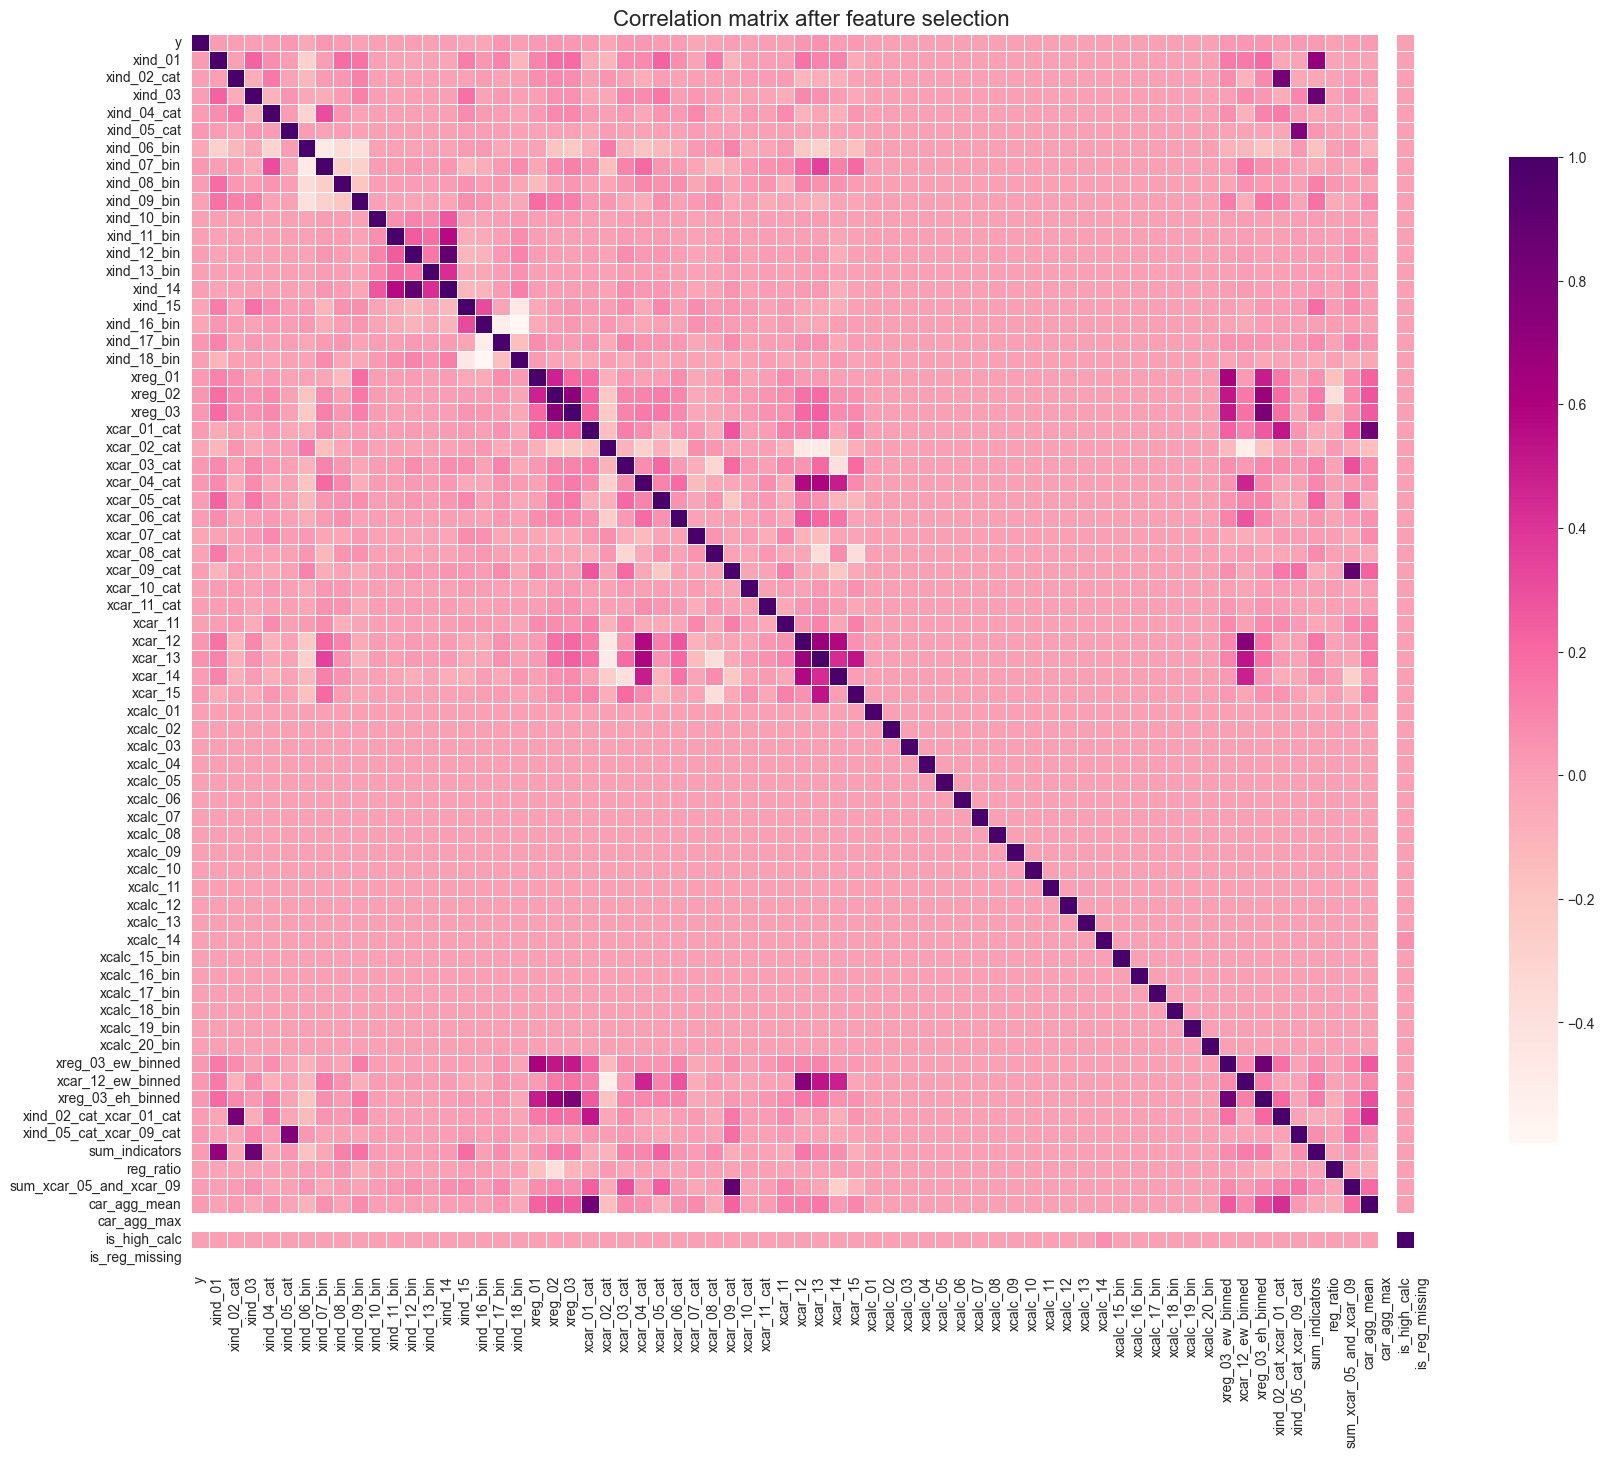

In [43]:
# Drop these features from the dataset
data_dropped = data.drop(columns=highly_correlated_features)

# Plot the correlation matrix after dropping the highly correlated features
corr_matrix_dropped = data_dropped.corr()

plt.figure(figsize=(20,16))
sns.heatmap(
    corr_matrix_dropped,
    annot=False,
    cmap="RdPu",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title('Correlation matrix after feature selection', fontsize=16)

In [44]:
Xdatadropped = data_dropped.drop('y', axis=1)
ydatadropped = data_dropped.y

In [45]:
Xtrain, Xtemp, ytrain, ytemp = train_test_split(Xdatadropped, ydatadropped, test_size=0.4, random_state=111)
Xval, Xtest, yval, ytest = train_test_split(Xtemp, ytemp, test_size=0.5, random_state=111)

In [46]:
model = RandomForestClassifier(random_state=111)
model.fit(Xtrain, ytrain)

# Make predictions
y_pred = model.predict(Xval)

# Evaluate the model
print(classification_report(yval, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114687
           1       1.00      0.00      0.00      4355

    accuracy                           0.96    119042
   macro avg       0.98      0.50      0.49    119042
weighted avg       0.96      0.96      0.95    119042



The model has achieved an overall accuracy of 96%, but it performs poorly in predicting the minority class (class 1). While it has a high precision of 1.00 for class 1, the recall is 0.00, meaning that it fails to correctly identify any instances of class 1. This results in an F1-score of 0.00 for class 1, suggesting that the model is biased toward predicting class 0.

Now let's use some wrapper method. Wrapper methods, or greedy algorithms, train a model with a subset of features and iteratively adjust the set based on performance. The process stops when performance drops or a target number of features is reached. They provide an optimal feature set, leading to better accuracy than filter methods, but are computationally more expensive.

I'll use RFE, a greedy optimization method that recursively selects features. The estimator is trained on an initial set, and features are ranked by importance. The least important ones are removed until the desired number of features remains.

In [47]:
from sklearn.feature_selection import RFE

X = data.drop(columns=['y'])
y = data['y']

Xtrain, Xtemp, ytrain, ytemp = train_test_split(Xdata, ydata, test_size=0.4, random_state=111) 
Xval, Xtest, yval, ytest = train_test_split(Xtemp, ytemp, test_size=0.5, random_state=111) 

model = XGBClassifier(eval_metric='logloss')

selector = RFE(estimator=model, n_features_to_select=25, step=1)

# Fit the RFE selector to the training data
selector = selector.fit(Xtrain, ytrain)

In [48]:
# Get the selected features' column names
selected_features = Xtrain.columns[selector.support_]
print(f'Selected Features: {selected_features}')

Selected Features: Index(['xind_01', 'xind_02_cat', 'xind_03', 'xind_04_cat', 'xind_05_cat',
       'xind_06_bin', 'xind_07_bin', 'xind_08_bin', 'xind_09_bin', 'xind_15',
       'xind_16_bin', 'xind_17_bin', 'xreg_01', 'xreg_02', 'xreg_03',
       'xcar_01_cat', 'xcar_02_cat', 'xcar_03_cat', 'xcar_07_cat',
       'xcar_09_cat', 'xcar_11', 'xcar_13', 'xcar_15', 'xcalc_01', 'xcalc_04'],
      dtype='object')


In [49]:
#Train and fit the model with selected features
Xtrain_selected = Xtrain[selected_features]
Xval_selected = Xval[selected_features]
model.fit(Xtrain_selected, ytrain)

# Evaluate the model performance
accuracy = model.score(Xval_selected, yval)
print(f'Model Accuracy with Selected Features: {accuracy}')

Model Accuracy with Selected Features: 0.9633490700761076


The model achieved an accuracy of 96.33% with the selected features, indicating strong overall performance. However, due to class imbalance, the model is primarily predicting the majority class, which is reflected in the poor precision and recall for the minority class. We can see that each technique produces similar results for the minority class because of this.

## VII. PCA

Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms features into a smaller set of uncorrelated components, capturing the maximum variance in the data. By reducing the number of features, PCA helps to simplify models, improve computational efficiency, and potentially reduce overfitting. I'll use PCA to identify the most important components and retain only those that explain the majority of the variance, reducing the dataset's dimensionality while preserving critical information.

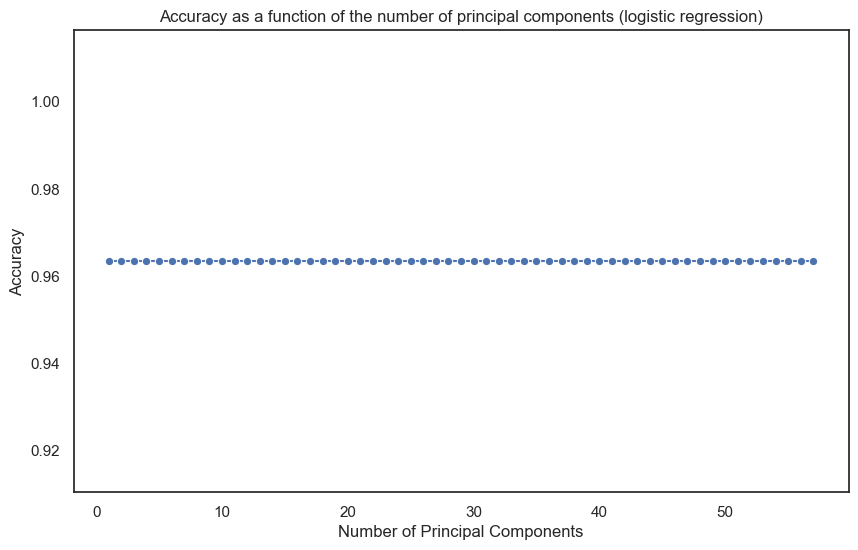

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Initialize lists to store accuracy and number of components
logreg_accuracies = []
logreg_num_components_list = []

# Max number of components to consider
max_components = 60

for n_components in range(1, min(max_components, Xtrain.shape[1]) + 1):
    # Standardize data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(Xtrain)
    X_val_scaled = scaler.transform(Xval)

    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_val_pca = pca.transform(X_val_scaled)

    # Train Logistic Regression classifier
    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_train_pca, ytrain)

    # Predict and evaluate accuracy
    y_pred = logreg.predict(X_val_pca)
    accuracy = accuracy_score(yval, y_pred)
    logreg_accuracies.append(accuracy)
    logreg_num_components_list.append(n_components)

plot_data = pd.DataFrame({
    'Number of Principal Components': logreg_num_components_list,
    'Accuracy': logreg_accuracies
})

# Plot the graph
sns.set(style="white")
plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_data, x='Number of Principal Components', y='Accuracy', marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of the number of principal components (logistic regression)')

plt.show()

In [51]:
lr_max_accuracy_index = np.argmax(logreg_accuracies)
lr_max_accuracy_components = logreg_num_components_list[lr_max_accuracy_index]
print(f'Maximum accuracy achieved with {lr_max_accuracy_components} principal components: {logreg_accuracies[lr_max_accuracy_index]}')

Maximum accuracy achieved with 1 principal components: 0.9634162732480973


The analysis shows that the maximum accuracy of the logistic regression model was achieved using just one principal component. This indicates that the first principal component effectively captures the most critical information for the classification task, potentially due to the dataset's variance being concentrated along this dimension. While this suggests an efficient representation of the data, it is essential to validate these findings by examining the explained variance and testing with additional components to ensure no significant information is overlooked. Overall, the results demonstrate the potential of PCA to simplify models without compromising predictive performance.

## VIII. Final classification

Now I will try to find a combination of the previous steps to create the most accurate model. I will consider 3 models: random forest, XGBoost and linear regression. Each model I will train on:
- raw data,
- balanced data (oversampling),
- subset of data (wrapper method),
- PCA-modified data.

In [52]:
# Create scaler
scaler = StandardScaler()

# Scale data
Xtrainbasic_scaled = scaler.fit_transform(Xtrainbasic)
Xvalbasic_scaled = scaler.transform(Xvalbasic)
Xtestbasic_scaled = scaler.transform(Xtestbasic)

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    return {
        'accuracy': accuracy_score(y_val, y_pred),
        'precision': precision_score(y_val, y_pred, zero_division=0),
        'recall': recall_score(y_val, y_pred, zero_division=0),
        'f1_score': f1_score(y_val, y_pred, zero_division=0)
    }

# Models list
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='liblinear'),
    'Random Forest': RandomForestClassifier(n_jobs=-1),
    'XGBoost': XGBClassifier(tree_method='hist', eval_metric='logloss')
}

In [54]:
# Oversampling
smote = SMOTE(random_state=111)
X_train_balanced, y_train_balanced = smote.fit_resample(Xtrainbasic_scaled, ytrainbasic)

In [55]:
# Feature selection
def perform_rfe(model, X_train, y_train, X_val):
    rfe_selector = RFE(estimator=model, n_features_to_select=X_train.shape[1] // 2, step=5)
    rfe_selector = rfe_selector.fit(X_train, y_train)
    return X_train[:, rfe_selector.support_], X_val[:, rfe_selector.support_]

In [56]:
# Dimensionality reduction
def apply_pca(X_train, X_val, n_components=0.95):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)
    return X_train_pca, X_val_pca

In [57]:
# PCA Transformation
X_train_pca, X_val_pca = apply_pca(Xtrainbasic_scaled, Xvalbasic_scaled)

In [58]:
# RFE, optimized
rfe_results = {}
for model_name, model_class in models.items():
    model = model_class
    if model_name == 'Random Forest':
        model.set_params(n_jobs=-1, n_estimators=50)  # Reduce trees for speed
    elif model_name == 'XGBoost':
        model.set_params(tree_method='hist', n_estimators=50)  # Use faster tree method
    
    # Apply RFE with step size of 5
    rfe_results[model_name] = perform_rfe(model, Xtrainbasic_scaled, ytrainbasic, Xvalbasic_scaled)

In [59]:
from sklearn.base import clone

# Comprehensive evaluation
results = {}

def run_comprehensive_evaluation():
    evaluation_scenarios = [
        ('Raw data', Xtrainbasic_scaled, ytrainbasic, Xvalbasic_scaled, yvalbasic),
        ('Balanced data', X_train_balanced, y_train_balanced, Xvalbasic_scaled, yvalbasic),
        ('PCA-transformed data', X_train_pca, ytrainbasic, X_val_pca, yvalbasic)
    ]
    # Add RFE results to scenarios
    for model_name in rfe_results:
        X_train_rfe, X_val_rfe = rfe_results[model_name]
        evaluation_scenarios.append((f'{model_name} RFE-selected features', X_train_rfe, ytrainbasic, X_val_rfe, yvalbasic))

    for scenario_name, X_train, y_train, X_val, y_val in evaluation_scenarios:
        results[scenario_name] = {}
        for model_name, model_class in models.items():
            # Create a fresh instance of the model
            model = clone(model_class)
            
            model.fit(X_train, y_train)
            
            results[scenario_name][model_name] = evaluate_model(model, X_val, y_val)

run_comprehensive_evaluation()

In [60]:
data = []

# Iterate through results dictionary and collect the data
for scenario_name, models_metrics in results.items():
    for model_name, metrics in models_metrics.items():
        row = {'Scenario': scenario_name, 'Model': model_name}
        row.update(metrics)  # Add the metrics (accuracy, precision, recall, f1_score) to the row
        data.append(row)

df = pd.DataFrame(data)

print(df.to_string(index=False))

                                 Scenario               Model  accuracy  precision   recall  f1_score
                                 Raw data Logistic Regression  0.963416   0.000000 0.000000  0.000000
                                 Raw data       Random Forest  0.963408   0.000000 0.000000  0.000000
                                 Raw data             XGBoost  0.963416   0.500000 0.000459  0.000918
                            Balanced data Logistic Regression  0.592379   0.049268 0.554305  0.090493
                            Balanced data       Random Forest  0.963399   0.000000 0.000000  0.000000
                            Balanced data             XGBoost  0.963416   0.000000 0.000000  0.000000
                     PCA-transformed data Logistic Regression  0.963416   0.000000 0.000000  0.000000
                     PCA-transformed data       Random Forest  0.963408   0.000000 0.000000  0.000000
                     PCA-transformed data             XGBoost  0.963399   0.333333

In [61]:
df = pd.DataFrame(data)

# Function to find the best model based on a given metric
def best_model_by_metric(df, metric='accuracy'):
    # Sort the dataframe by the chosen metric, in descending order
    best_model_row = df.sort_values(by=metric, ascending=False).iloc[0]
    return best_model_row['Scenario'], best_model_row['Model'], best_model_row[metric]

best_accuracy = best_model_by_metric(df, 'accuracy')
best_precision = best_model_by_metric(df, 'precision')
best_recall = best_model_by_metric(df, 'recall')
best_f1_score = best_model_by_metric(df, 'f1_score')

print(f"Best Model by Accuracy: {best_accuracy}")
print(f"Best Model by Precision: {best_precision}")
print(f"Best Model by Recall: {best_recall}")
print(f"Best Model by F1 Score: {best_f1_score}")

Best Model by Accuracy: ('Raw data', 'Logistic Regression', np.float64(0.9634162732480973))
Best Model by Precision: ('Raw data', 'XGBoost', np.float64(0.5))
Best Model by Recall: ('Balanced data', 'Logistic Regression', np.float64(0.5543053960964409))
Best Model by F1 Score: ('Balanced data', 'Logistic Regression', np.float64(0.0904933273354326))


For the final classification, I'll use the first model (raw data with logistic regression) as I'm interested in high accuracy.

In [62]:
# Final classification tests on the test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Сhoose and train the final model
final_model = LogisticRegression()
final_model.fit(Xtrainbasic_scaled, ytrainbasic)

# Уvaluate on the test set
y_pred = final_model.predict(Xtestbasic_scaled)

# Step 3: Compute evaluation metrics
test_results = {
    'accuracy': accuracy_score(ytestbasic, y_pred),
    'precision': precision_score(ytestbasic, y_pred, zero_division=1)
}

print("Test Set Results:")
for metric, value in test_results.items():
    print(f"{metric.capitalize()}: {value:.4f}")

Test Set Results:
Accuracy: 0.9629
Precision: 1.0000


The model achieved an accuracy of 96.29% on the test set, with perfect precision (1.00) for the positive class. However, this suggests that the model may be overfitting to the majority class, as high precision without corresponding recall can indicate that the model is not detecting the minority class effectively. To improve the situation, we can address class imbalance (by over- or undersampling) or tune the hyperparameters.